In [1]:
# quandl for financial data
import quandl
# pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [5]:
msft = quandl.get("EOD/MSFT", authtoken="jxzUS8JtQiyKg6EtpXhZ", start_date="2016-01-02")
msft.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-01-04,54.32,54.8000,53.39,54.80,53777963.0,0.0,1.0,51.486406,51.941367,50.604919,51.941367,53777963.0
2016-01-05,54.93,55.3900,54.54,55.05,34079674.0,0.0,1.0,52.064585,52.500590,51.694930,52.178326,34079674.0
2016-01-06,54.32,54.4001,53.64,54.05,39518863.0,0.0,1.0,51.486406,51.562328,50.841878,51.230490,39518863.0
2016-01-07,52.70,53.4850,52.07,52.17,56564852.0,0.0,1.0,49.950913,50.694964,49.353777,49.448560,56564852.0
2016-01-08,52.37,53.2800,52.15,52.33,48753969.0,0.0,1.0,49.638127,50.500657,49.429604,49.600214,48753969.0


In [4]:
ge = quandl.get("EOD/GE", authtoken="jxzUS8JtQiyKg6EtpXhZ", start_date="2016-01-02")
ge.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-01-04,30.55,30.760,30.25,30.71,62875775.0,0.0,1.0,28.432229,28.627671,28.153025,28.581137,62875775.0
2016-01-05,30.68,30.840,30.45,30.74,55117900.0,0.0,1.0,28.553217,28.702126,28.339161,28.609058,55117900.0
2016-01-06,30.27,30.715,30.05,30.25,62647791.0,0.0,1.0,28.171639,28.585791,27.966890,28.153025,62647791.0
2016-01-07,29.65,29.955,28.85,28.97,92216299.0,0.0,1.0,27.594618,27.878475,26.850075,26.961757,92216299.0
2016-01-08,29.20,29.300,28.34,28.45,74483885.0,0.0,1.0,27.175813,27.268881,26.375429,26.477804,74483885.0


In [13]:
msft = msft[-200:]
msft.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-03-29,90.180,92.290,88.40,91.27,45867548.0,0.0,1.0,90.180,92.290,88.40,91.27,45867548.0
2018-04-02,90.470,90.880,87.51,88.52,48515417.0,0.0,1.0,90.470,90.880,87.51,88.52,48515417.0
2018-04-03,89.575,90.050,87.89,89.71,37213837.0,0.0,1.0,89.575,90.050,87.89,89.71,37213837.0
2018-04-04,87.850,92.760,87.73,92.33,35559956.0,0.0,1.0,87.850,92.760,87.73,92.33,35559956.0
2018-04-05,92.435,93.065,91.40,92.38,29771881.0,0.0,1.0,92.435,93.065,91.40,92.38,29771881.0


In [12]:
ge = ge[-200:]
ge.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-03-29,13.58,13.66,13.350,13.48,74514308.0,0.0,1.0,13.58,13.66,13.350,13.48,74514308.0
2018-04-02,13.45,13.54,12.960,13.12,72086963.0,0.0,1.0,13.45,13.54,12.960,13.12,72086963.0
2018-04-03,13.12,13.14,12.800,13.13,59771402.0,0.0,1.0,13.12,13.14,12.800,13.13,59771402.0
2018-04-04,12.82,13.30,12.790,13.28,57156389.0,0.0,1.0,12.82,13.30,12.790,13.28,57156389.0
2018-04-05,13.29,13.56,13.165,13.43,53471366.0,0.0,1.0,13.29,13.56,13.165,13.43,53471366.0


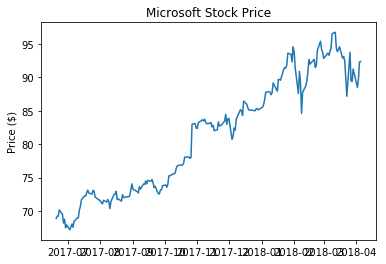

In [15]:
plt.plot(msft.index, msft['Adj_Close'])
plt.title('Microsoft Stock Price')
plt.ylabel('Price ($)')
plt.show()

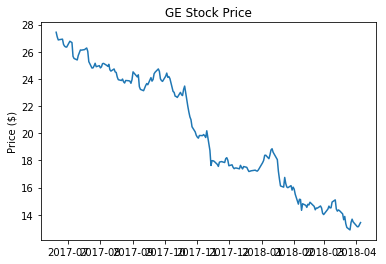

In [16]:
plt.plot(ge.index, ge['Adj_Close'])
plt.title('GE Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [19]:
from fbprophet import Prophet

### Microsoft Prediction

In [20]:
msft['ds'] = msft.index
msft['y'] = msft['Adj_Close']

msft_forecast_data = msft[['ds', 'y']].copy()
msft_forecast_data.reset_index(inplace=True)
del msft_forecast_data['Date']
msft_forecast_data.head()

/Users/brianstanton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brianstanton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ds,y
0,2017-06-20,68.870873
1,2017-06-21,69.225522
2,2017-06-22,69.215671
3,2017-06-23,70.151550
4,2017-06-26,69.481658


In [34]:
msft_m = Prophet()
msft_m.fit(msft_forecast_data)

msft_future = msft_m.make_future_dataframe(periods=30, freq='D')
msft_future.tail()

msft_forecast = msft_m.predict(msft_future)
msft_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/brianstanton/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
225,2018-05-01,93.604752,91.411376,95.732296
226,2018-05-02,93.654920,91.380612,95.955932
227,2018-05-03,93.521625,91.245973,95.651368
228,2018-05-04,94.021674,91.774254,96.359426
229,2018-05-05,93.767088,91.383990,96.103150


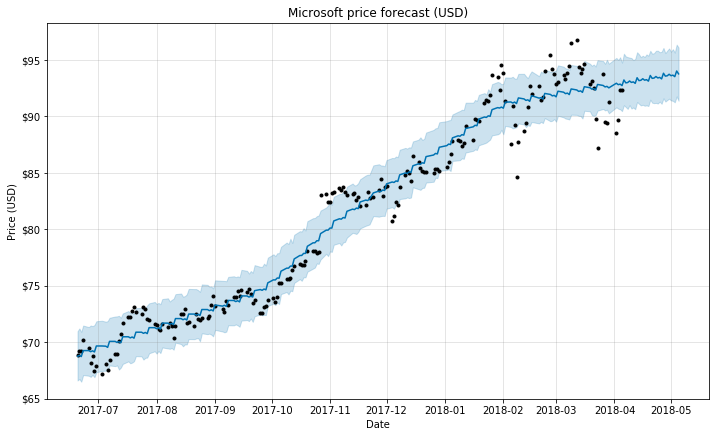

In [35]:
# Plot the forecast
msft_fig = msft_m.plot(msft_forecast, xlabel='Date', ylabel='Price (USD)');
plt.title('Microsoft price forecast (USD)')
msft_fig.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

### GE Prediction

In [27]:
ge['ds'] = ge.index
ge['y'] = ge['Adj_Close']

ge_forecast_data = ge[['ds', 'y']].copy()
ge_forecast_data.reset_index(inplace=True)
del ge_forecast_data['Date']
ge_forecast_data.head()

,ds,y
0,2017-06-20,27.433058
1,2017-06-21,27.091729
2,2017-06-22,26.867428
3,2017-06-23,26.886932
4,2017-06-26,26.925941


In [36]:
ge_m = Prophet()
ge_m.fit(ge_forecast_data)

ge_future = ge_m.make_future_dataframe(periods=30, freq='D')
ge_future.tail()

ge_forecast = ge_m.predict(ge_future)
ge_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/brianstanton/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
225,2018-05-01,12.087555,11.303948,12.877268
226,2018-05-02,12.059096,11.245129,12.888050
227,2018-05-03,11.976627,11.168339,12.822227
228,2018-05-04,11.942386,11.077540,12.850716
229,2018-05-05,12.169819,11.215728,13.054622


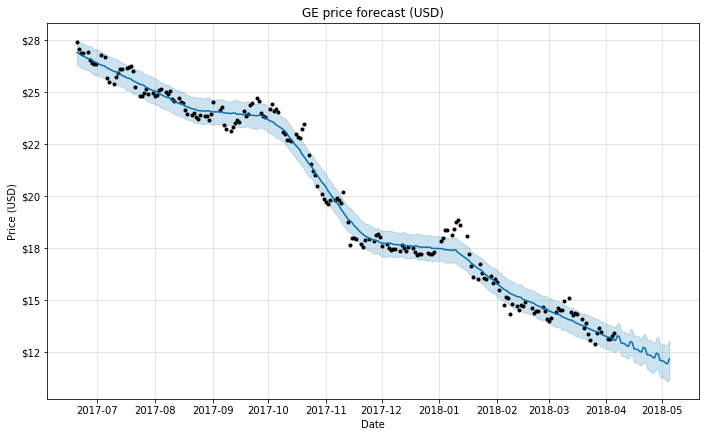

In [37]:
# Plot the forecast
ge_fig = ge_m.plot(ge_forecast, xlabel='Date', ylabel='Price (USD)');
plt.title('GE price forecast (USD)')
ge_fig.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

### Microsoft Components

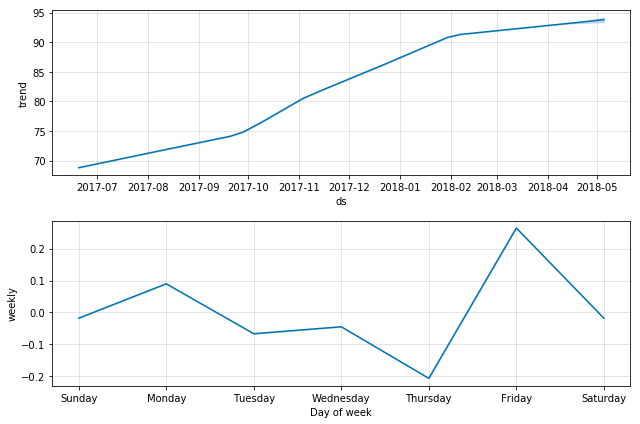

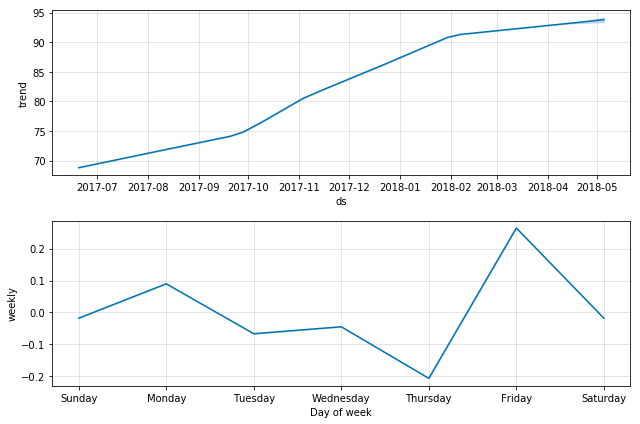

In [38]:
msft_m.plot_components(msft_forecast)

### GE Components

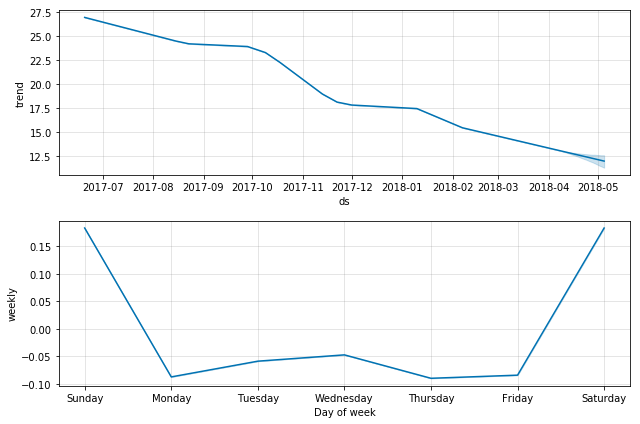

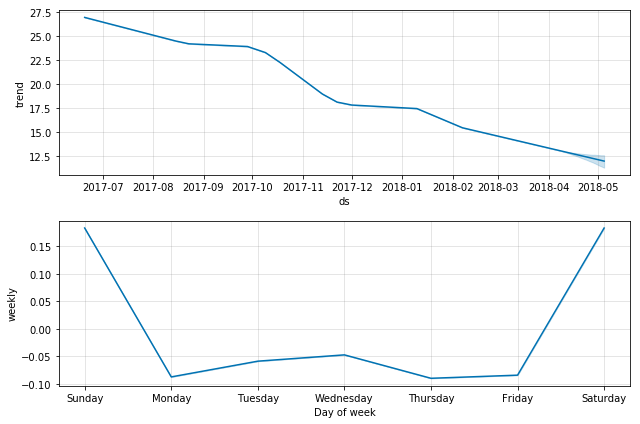

In [39]:
ge_m.plot_components(ge_forecast)